# Windy King Grid
---
Windy King Grid es una nueva implementacion del pasado trabajo Windy grid con una pequena diferencia, simplemente se agregan unas pocas mas acciones que son moverse en diagonales, asi simulando el movimiento de un rey en el ajedrez.

In [1]:
using PyPlot
ioff()

aqui solamente agregamos unas pocas de acciones

In [2]:
WORLD_HEIGHT = 7
WORLD_WIDTH = 10
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4
ACTION_UP_LEFT = 5
ACTION_UP_RIGHT = 6
ACTION_DOWN_LEFT = 7
ACTION_DOWN_RIGHT = 8

EPSILON = 0.1
ALPHA = .5
REWARD = -1
START = [4,1]
GOAL = [4,8]
ACTIONS = [ACTION_UP,ACTION_DOWN,ACTION_LEFT,ACTION_RIGHT,
    ACTION_UP_LEFT,ACTION_UP_RIGHT,ACTION_DOWN_LEFT,ACTION_DOWN_RIGHT];

# Paso
---
Aqui se pone un poco mas interesante, ahora tenemos que definir cada uno de los nuevos pasos dada cada nueva accion, es practicamente lo mismo.

In [3]:
function step(state, action)
    i, j = state
    if action == ACTION_UP
        return [max(i - 1 - WIND[j], 1), j]
        
    elseif action == ACTION_DOWN
         return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1), j]
        
    elseif action == ACTION_LEFT
        return [max(i - WIND[j], 1), max(j - 1, 1)]
        
    elseif action == ACTION_RIGHT
        return [max(i - WIND[j], 1), min(j + 1, WORLD_WIDTH)]
        
    elseif action == ACTION_UP_LEFT
        return [max(i - 1 - WIND[j], 1), max(j - 1, 1)]
    
    elseif action == ACTION_UP_RIGHT
        return [max(i - 1 - WIND[j], 1),min(j + 1, WORLD_WIDTH)]
        
    elseif action == ACTION_DOWN_LEFT
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1),max(j - 1, 1)]
        
    elseif action == ACTION_DOWN_RIGHT
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1),min(j + 1, WORLD_WIDTH)]
    end
end

step (generic function with 1 method)

# Sarsa
---
solo hay un pequeno cambio, ahora el numero de acciones es mayor, asi que la exploracion cambia en las acciones que puede tomar, fuera de eso no existe cambio fuerte en el algoritmo, el algoritmo de SARSA ahora trabajara en un espacio con 8 acciones en lugar de 4

In [4]:
function episode(q_value)
    # track the total time steps in this episode
    time = 0
    
    # initialize state
    state = START
    # choose an action based on epsilon-greedy algorithm
    if rand(1)[1] < EPSILON
        action = ACTIONS[rand(1:8)]
    else
        values_ = q_value[state[1], state[2], :]
        action = []
        for i in enumerate(values_)
            action_,value_ = i
            if value_ == maximum(values_)
                push!(action,action_)
            end
        end
        action = action[rand(1:length(action))]
    end
    
    # keep going until get to the goal state
    while state != GOAL

        next_state = step(state,action)
        if rand(1)[1] < EPSILON
            next_action = ACTIONS[rand(1:8)]
        else
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = []
            for i in enumerate(values_)
                action_,value_ = i
                if value_ == maximum(values_)
                    push!(next_action,action_)
                end
            end
            next_action = next_action[rand(1:length(next_action))]
        end
        # Sarsa update
        q_value[state[1], state[2], action] += ALPHA * (REWARD + q_value[next_state[1], next_state[2], next_action] - q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time += 1
    end

    return time
end

episode (generic function with 1 method)

In [36]:
function print_optimal_policy(q_value)
    optimal_policy = []
    for i in range(1, stop=WORLD_HEIGHT)
        push!(optimal_policy,[])
        for j in range(1, stop=WORLD_WIDTH)
            if [i, j] == GOAL
                append!(optimal_policy[end], 'G')
                continue
            end
            bestAction = argmax(q_value[i, j, :])
            if bestAction == ACTION_UP
                append!(optimal_policy[end], '↑')
            elseif bestAction == ACTION_DOWN
                append!(optimal_policy[end], '↓')
            elseif bestAction == ACTION_LEFT
                append!(optimal_policy[end], '←')
            elseif bestAction == ACTION_RIGHT
                append!(optimal_policy[end], '→')
            elseif bestAction == ACTION_UP_LEFT
                append!(optimal_policy[end], '↖')
            elseif bestAction == ACTION_UP_RIGHT
                append!(optimal_policy[end], '↗')
            elseif bestAction == ACTION_DOWN_LEFT
                append!(optimal_policy[end], '↙')
            elseif bestAction == ACTION_DOWN_RIGHT
                append!(optimal_policy[end], '↘')
            end
        end
    end
    for row in optimal_policy
        println(row)
    end
end
#↖ ↗ ↘ ↙    ← → ↑ ↓
#ACTION_UP_LEFT,ACTION_UP_RIGHT,ACTION_DOWN_LEFT,ACTION_DOWN_RIGHT];

In [6]:
function runagent(n)
    q_value = zeros((WORLD_HEIGHT,WORLD_WIDTH,8))
    episode_limit = 500
    steps = []
    ep = 0
    while ep < n
        push!(steps,episode(q_value))
        ep+=1
    end
    println("SARSA Optimal Policy:")
    print_optimal_policy(q_value)
    println("")
    return steps
end


runagent (generic function with 1 method)

In [37]:
print_optimal_policy(zeros((WORLD_HEIGHT,WORLD_WIDTH,8)))

Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', 'G', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']


tras correr nuestro algoritmo esta es nuestra nueva tabla qa diferencia de la de arriba que es la tabla q antes de haber aprendido

In [38]:
y = runagent(300);

SARSA Optimal Policy:
Any['↘', '↓', '↓', '↗', '↘', '↗', '↘', '↘', '↗', '↓']
Any['↓', '↑', '↙', '↑', '↙', '←', '↘', '↗', '↘', '↘']
Any['↘', '←', '↓', '↙', '↓', '←', '↘', '↘', '↗', '↙']
Any['↘', '↘', '↑', '→', '↓', '↓', '↙', 'G', '↙', '←']
Any['↘', '↘', '↘', '↘', '↘', '↘', '↘', '↓', '←', '↙']
Any['→', '→', '↘', '↘', '↘', '↘', '→', '→', '↗', '←']
Any['↖', '↑', '↘', '↘', '↗', '↘', '↗', '↓', '↓', '↖']



podemos observar que ahora con las nuevas acciones que tenemos inclusive existen lugares por los cuales nuestro agente nunca pasa, habria que aumentar nuestra exploracion, con el objetivo de que haya mas posibilidad de que recorra mas lugares y aumentar el numero de episodios

In [9]:
EPSILON = .1
y = runagent(1000);

SARSA Optimal Policy:
Any['U', 'D', 'R', 'R', 'R']
Any['D', 'L', 'R', 'R', 'D', 'D']
Any['L', 'L', 'L', 'R', 'D']
Any['R', 'L', 'G']
Any['D', 'D', 'L']
Any['R', 'R', 'R', 'R', 'R']
Any['R', 'R', 'U', 'R']



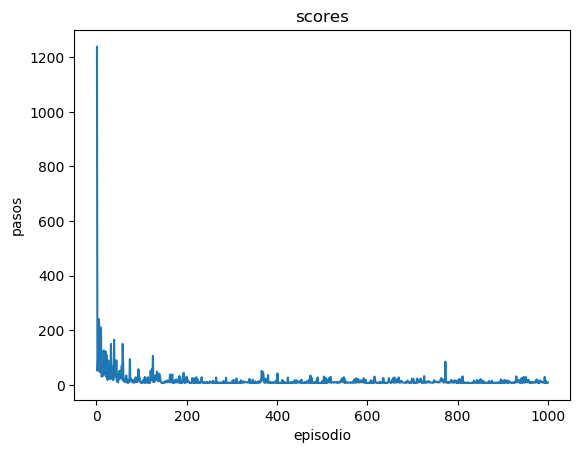

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000233ECDD8>

In [10]:
plt[:title]("scores")
plt[:xlabel]("episodio")
plt[:ylabel]("pasos")
plt[:plot]([i for i in 1:length(y)],y)

aunque nuestra tabla_q quede con lugares que no ha recorrido nuestro agente, podemos notar que nuestro agente de igual manera llega rapidamente a un numero de pasos aceptable para solucionar nuestro problema